In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\olive\AppData\Local\Temp\ipykernel_34732\930725367.py:5: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base.prepare(engine, reflect=True)


In [6]:
# Print the available classes (tables)
print(Base.classes.keys())

# Save references (typically they are 'measurement' and 'station')
Measurement = Base.classes.measurement
Station = Base.classes.station


['measurement', 'station']


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date_str = session.query(Measurement.date)\
                .order_by(Measurement.date.desc())\
                .first()[0]
print("Most recent date:", recent_date_str)


Most recent date: 2017-08-23


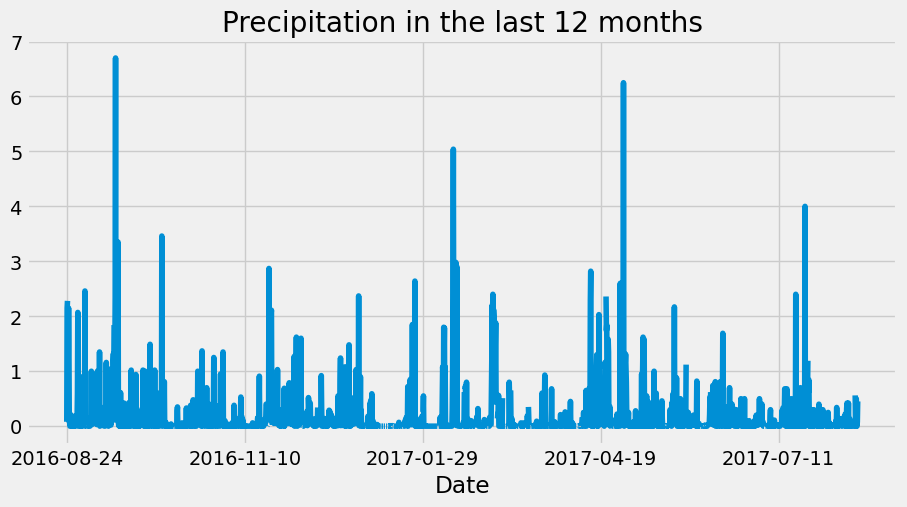

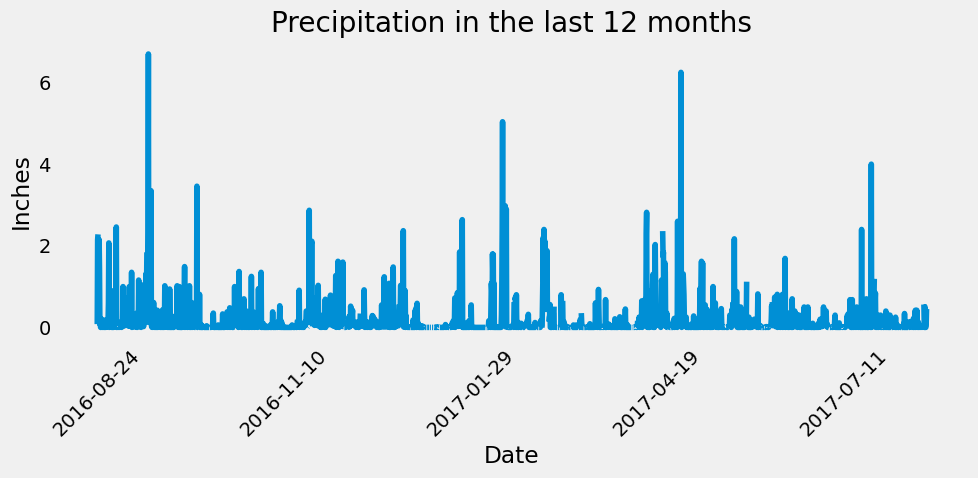

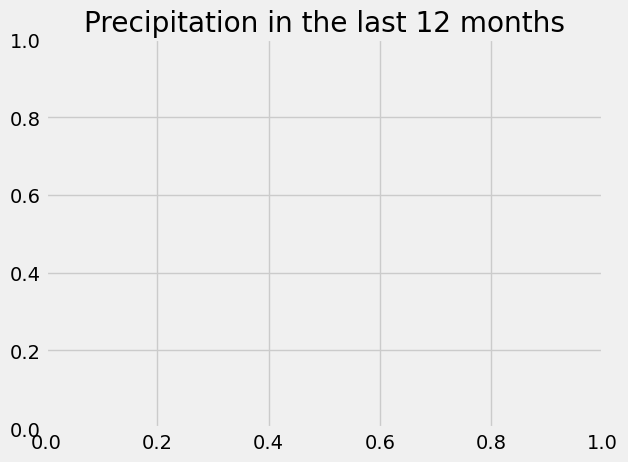

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(recent_date_str, '%Y-%m-%d')
one_year_ago = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Use the `date` as the index.
df = pd.DataFrame(results, columns=['date', 'precipitation'])   

# Sort the dataframe by date
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation in the last 12 months", figsize=(10, 5), legend=False)
plt.xticks(rotation=45)
plt.ylabel("Inches")
plt.xlabel("Date") 
plt.title("Precipitation in the last 12 months")
plt.tight_layout()
plt.grid()
plt.show()
plt.title("Precipitation in the last 12 months")
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print("Total number of stations:", total_stations)

Total number of stations: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.##
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
print("Most active stations (station, count):", active_stations)    

Most active stations (station, count): [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Choose the station with the highest count ##
most_active_station = active_stations[0][0]

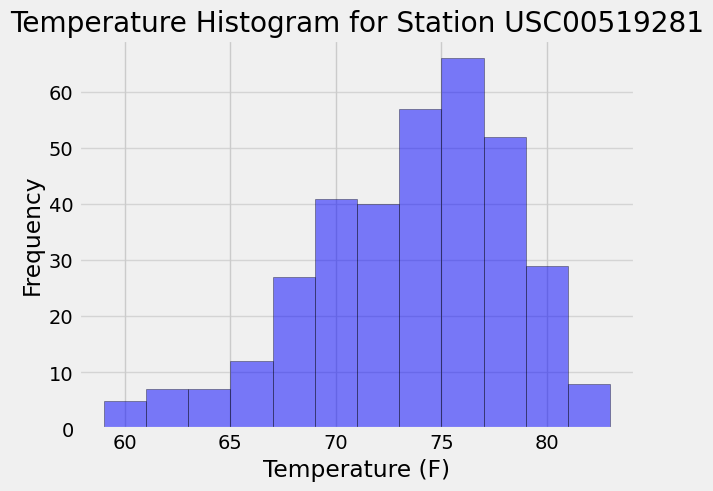

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs)\
    .filter(Measurement.station == most_active_station)\
    .filter(Measurement.date >= one_year_ago).all()
results = list(np.ravel(results))
plt.hist(results, bins=12, alpha=0.5, color='blue', edgecolor='black')
plt.title(f"Temperature Histogram for Station {most_active_station}")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


# Close Session

In [17]:
# Close Session
session.close()